In [193]:
import pandas as pd
import glob

In [194]:
path = r"../raw/*.csv"
files = glob.glob(path)
print("Files found:", files)
# combine all raw files into one dataframe
df = pd.concat(
    (pd.read_csv(f, dtype={'date': str}) for f in files),
    ignore_index=True
)

Files found: ['../raw\\api_data_aadhar_enrolment_0_500000.csv', '../raw\\api_data_aadhar_enrolment_1000000_1006029.csv', '../raw\\api_data_aadhar_enrolment_500000_1000000.csv']


In [195]:
df.shape

(1006029, 7)

In [196]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [197]:
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

In [198]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrolment'],
      dtype='object')

In [199]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             1006029 non-null  object
 1   state            1006029 non-null  object
 2   district         1006029 non-null  object
 3   pincode          1006029 non-null  int64 
 4   age_0_5          1006029 non-null  int64 
 5   age_5_17         1006029 non-null  int64 
 6   age_18_greater   1006029 non-null  int64 
 7   total_enrolment  1006029 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 61.4+ MB


In [201]:
df.duplicated().sum()

np.int64(22957)

In [202]:
df.drop_duplicates(inplace=True)

In [203]:
df.duplicated().sum()

np.int64(0)

In [204]:
df['date_raw'] = df['date']
df['state_raw'] = df['state']

In [205]:
df['state'] = df['state'].str.strip().str.title()

In [206]:
df['state'].nunique()

49

In [207]:
state_mapping = {
    # Andaman
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',

    # Dadra & Daman merger
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',

    # J&K
    'Jammu & Kashmir': 'Jammu And Kashmir',

    # Odisha
    'Orissa': 'Odisha',

    # Puducherry
    'Pondicherry': 'Puducherry',

    # West Bengal (spelling + spacing)
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal'
}


In [208]:
df['state'] = df['state'].replace(state_mapping)

In [209]:
df['state'].nunique()


37

After standardizing state names and resolving legacy and spelling inconsistencies, the dataset correctly reflects 37 administrative units including states and union territories.

In [210]:
df['date'].dtype
df['date_raw'].dtype

dtype('O')

In [211]:
# raw already string hai (good)
df['date_raw'] = df['date']

In [212]:
df['date_raw'].head(20)

0     02-03-2025
1     09-03-2025
2     09-03-2025
3     09-03-2025
4     09-03-2025
5     09-03-2025
6     09-03-2025
7     09-03-2025
8     09-03-2025
9     09-03-2025
10    09-03-2025
11    09-03-2025
12    09-03-2025
13    09-03-2025
14    09-03-2025
15    09-03-2025
16    09-03-2025
17    09-03-2025
18    09-03-2025
19    09-03-2025
Name: date_raw, dtype: object

In [213]:
df['date_raw'].sample(20)

820887    19-11-2025
733069    13-11-2025
10417     01-09-2025
494378    26-10-2025
87722     07-09-2025
95        20-03-2025
433701    18-10-2025
302595    23-09-2025
592131    02-11-2025
611890    03-11-2025
932283    25-12-2025
679733    09-11-2025
539535    29-10-2025
933615    25-12-2025
696142    10-11-2025
582815    01-11-2025
845483    25-11-2025
185317    13-09-2025
492366    26-10-2025
381268    15-10-2025
Name: date_raw, dtype: object

In [214]:
df['date_raw'].str.contains('/').value_counts()
df['date_raw'].str.contains('-').value_counts()

date_raw
True    983072
Name: count, dtype: int64

In [215]:
df['date'] = pd.to_datetime(
    df['date_raw'],
    dayfirst=True,
    errors='coerce'
)

In [216]:
df['date'].dtype

dtype('<M8[ns]')

In [217]:
df[['date_raw', 'date']].head(10)

,date_raw,date
0,02-03-2025,2025-03-02
1,09-03-2025,2025-03-09
2,09-03-2025,2025-03-09
3,09-03-2025,2025-03-09
4,09-03-2025,2025-03-09
5,09-03-2025,2025-03-09
6,09-03-2025,2025-03-09
7,09-03-2025,2025-03-09
8,09-03-2025,2025-03-09
9,09-03-2025,2025-03-09


Even when dates look consistent, explicit parsing is required to avoid silent misinterpretation by libraries.Although the dates appeared consistent in DD-MM-YYYY format, explicit day-first parsing was applied to prevent any ambiguity during conversion. The raw date values were preserved and verified against the parsed dates to ensure correctness.

In [218]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [219]:
df.groupby(['year','month'])['total_enrolment'].sum()

year  month
2025  3          16582
      4         257438
      5         183616
      6         215734
      7         616868
      9        1475879
      10        779617
      11       1052584
      12        733442
Name: total_enrolment, dtype: int64

In [220]:
df['pincode'].isna().sum()
df['pincode'].dtype

dtype('int64')

In [221]:
df['pincode'] = pd.to_numeric(df['pincode'], errors='coerce')

In [222]:
df = df[df['pincode'].between(100000, 999999)]

In [223]:
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.title()
)

In [224]:
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

df[age_cols] = (
    df[age_cols]
    .fillna(0)
    .astype(int)
)

df['total_enrolment'] = df[age_cols].sum(axis=1)

In [225]:
df[['age_0_5','age_5_17','age_18_greater','total_enrolment']].head()

,age_0_5,age_5_17,age_18_greater,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [226]:
df.describe()

,date,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment,year,month
count,983072,983072.000000,983072.000000,983072.000000,983072.000000,983072.000000,983072.0,983072.000000
mean,2025-10-23 05:35:51.258097920,518469.318987,3.534216,1.720026,0.169328,5.423570,2025.0,10.208800
min,2025-03-02 00:00:00,100000.000000,0.000000,0.000000,0.000000,1.000000,2025.0,3.000000
25%,2025-09-18 00:00:00,363621.000000,1.000000,0.000000,0.000000,1.000000,2025.0,9.000000
50%,2025-10-26 00:00:00,517401.000000,2.000000,0.000000,0.000000,2.000000,2025.0,10.000000
75%,2025-11-15 00:00:00,700093.000000,3.000000,1.000000,0.000000,5.000000,2025.0,11.000000
max,2025-12-31 00:00:00,855456.000000,2688.000000,1812.000000,855.000000,3965.000000,2025.0,12.000000
std,NaN,205492.403834,17.726248,14.529760,3.255971,31.932543,0.0,1.138325


In [227]:
(df['total_enrolment'] == 0).sum()

np.int64(0)

In [228]:
df.isna().sum()

date               0
state              0
district           0
pincode            0
age_0_5            0
age_5_17           0
age_18_greater     0
total_enrolment    0
date_raw           0
state_raw          0
year               0
month              0
dtype: int64

After cleaning, I verified that all critical columns had zero missing values, confirming data completeness and readiness for aggregation and analysis.

| Column                                  | Status | Meaning                      |
| --------------------------------------- | ------ | ---------------------------- |
| `date`                                  | ✅      | Proper datetime, no missing  |
| `state`                                 | ✅      | Standardized (37 states/UTs) |
| `district`                              | ✅      | Clean text                   |
| `pincode`                               | ✅      | Valid, no blanks             |
| `age_0_5`, `age_5_17`, `age_18_greater` | ✅      | Numeric, clean               |
| `total_enrolment`                       | ✅      | Correctly derived            |
| `date_raw`, `state_raw`                 | ✅      | Original data preserved      |
| `year`, `month`                         | ✅      | Safe temporal features       |


In [229]:
df.groupby('state')['total_enrolment'].sum().sort_values(ascending=False)

state
Uttar Pradesh                               1002631
Bihar                                        593753
Madhya Pradesh                               487892
West Bengal                                  369249
Maharashtra                                  363446
Rajasthan                                    340591
Gujarat                                      275042
Assam                                        225359
Karnataka                                    219618
Tamil Nadu                                   215710
Jharkhand                                    153612
Telangana                                    128948
Andhra Pradesh                               124273
Odisha                                       120454
Meghalaya                                    109239
Chhattisgarh                                  99773
Haryana                                       95085
Delhi                                         92838
Punjab                                        75773
Kerala

In [230]:
(df.groupby('state')['age_0_5'].sum() /
 df.groupby('state')['total_enrolment'].sum()).sort_values()

state
100000                                      0.000000
Meghalaya                                   0.192898
Nagaland                                    0.288612
Manipur                                     0.382150
Bihar                                       0.429322
Arunachal Pradesh                           0.451415
Sikkim                                      0.478161
Uttar Pradesh                               0.510384
Assam                                       0.612223
Jharkhand                                   0.625264
Tripura                                     0.650890
Rajasthan                                   0.660549
Gujarat                                     0.686110
Mizoram                                     0.700381
Kerala                                      0.716024
Delhi                                       0.730778
West Bengal                                 0.732349
Madhya Pradesh                              0.744517
Maharashtra                             

In [231]:
df.isna().sum()

date               0
state              0
district           0
pincode            0
age_0_5            0
age_5_17           0
age_18_greater     0
total_enrolment    0
date_raw           0
state_raw          0
year               0
month              0
dtype: int64

In [232]:
df.groupby(['year','month'])['total_enrolment'].sum()

year  month
2025  3          16582
      4         257438
      5         183616
      6         215734
      7         616868
      9        1475879
      10        779617
      11       1052584
      12        733442
Name: total_enrolment, dtype: int64

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

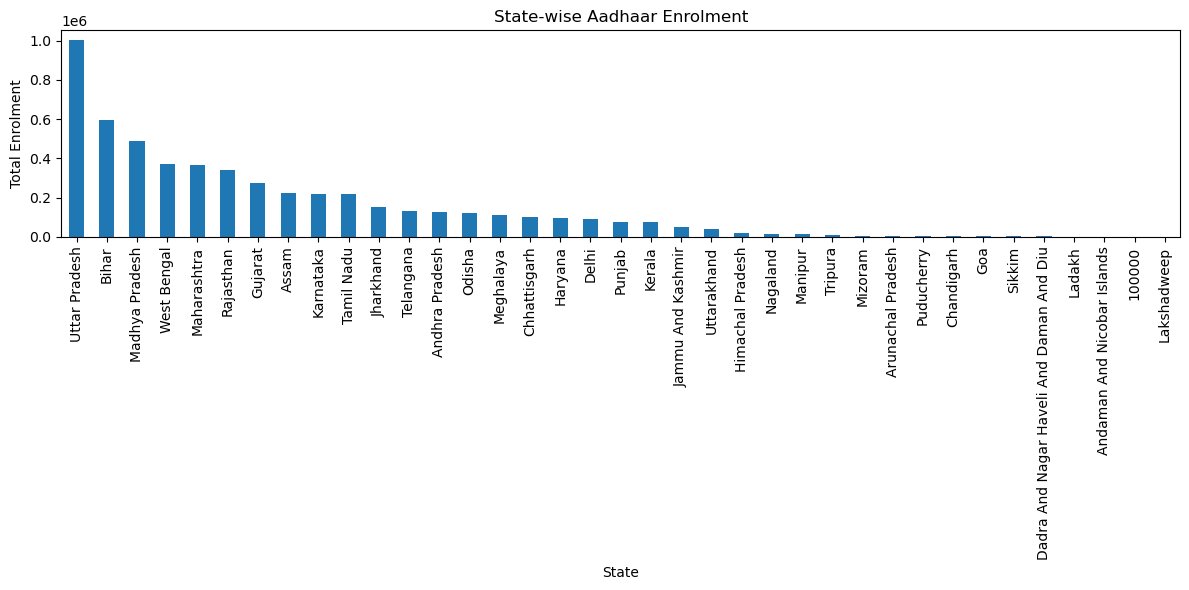

In [234]:
state_enrol = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
state_enrol.plot(kind='bar')
plt.title("State-wise Aadhaar Enrolment")
plt.ylabel("Total Enrolment")
plt.xlabel("State")
plt.tight_layout()
plt.show()

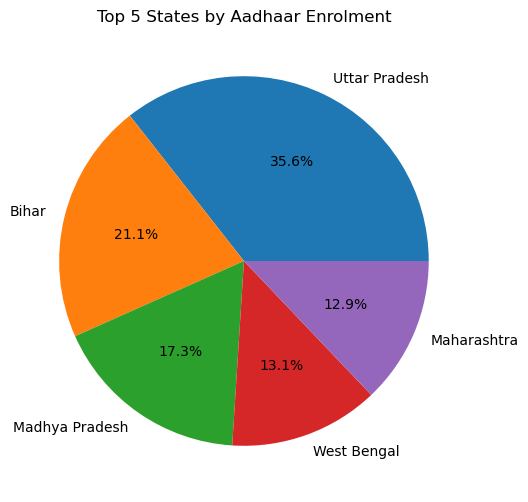

In [235]:
top5 = state_enrol.head(5)

plt.figure(figsize=(6,6))
top5.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top 5 States by Aadhaar Enrolment")
plt.ylabel("")
plt.show()

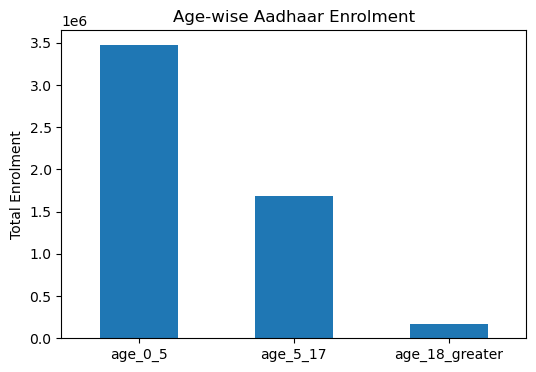

In [236]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(6,4))
age_totals.plot(kind='bar')
plt.title("Age-wise Aadhaar Enrolment")
plt.ylabel("Total Enrolment")
plt.xticks(rotation=0)
plt.show()

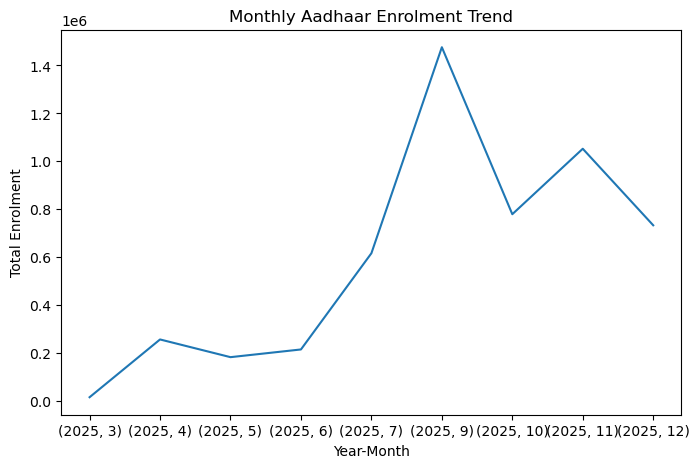

In [237]:
monthly = (
    df.groupby(['year','month'])['total_enrolment']
    .sum()
)

plt.figure(figsize=(8,5))
monthly.plot()
plt.title("Monthly Aadhaar Enrolment Trend")
plt.ylabel("Total Enrolment")
plt.xlabel("Year-Month")
plt.show()

All visualizations were generated using the cleaned dataset available in memory within the same notebook after preprocessing.

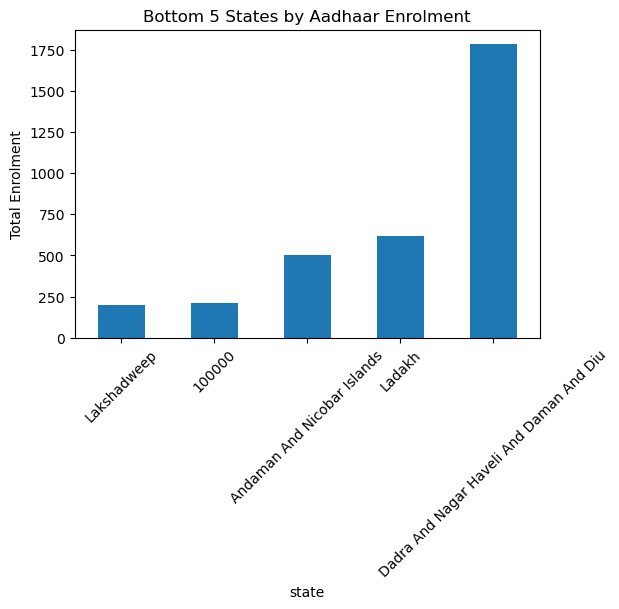

In [238]:
bottom5 = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values()
    .head(5)
)

plt.figure(figsize=(6,4))
bottom5.plot(kind='bar')
plt.title("Bottom 5 States by Aadhaar Enrolment")
plt.ylabel("Total Enrolment")
plt.xticks(rotation=45)
plt.show()

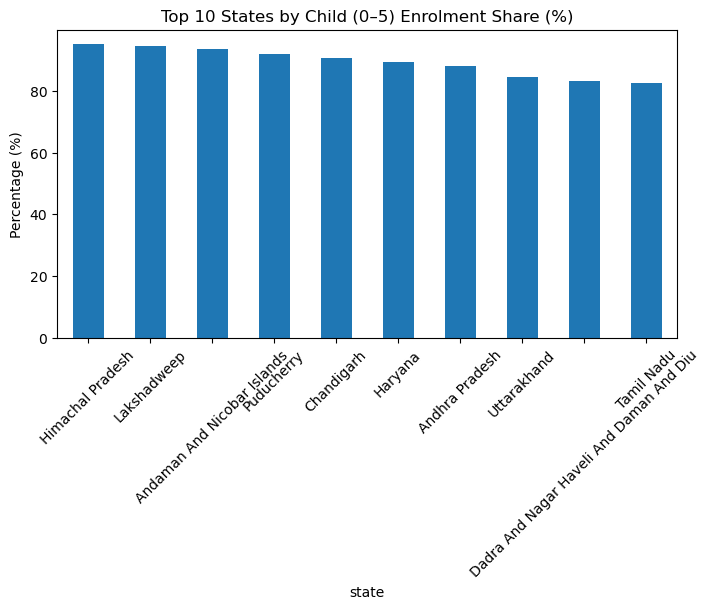

In [239]:
child_share = (
    df.groupby('state')['age_0_5'].sum() /
    df.groupby('state')['total_enrolment'].sum()
) * 100

child_share = child_share.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
child_share.plot(kind='bar')
plt.title("Top 10 States by Child (0–5) Enrolment Share (%)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

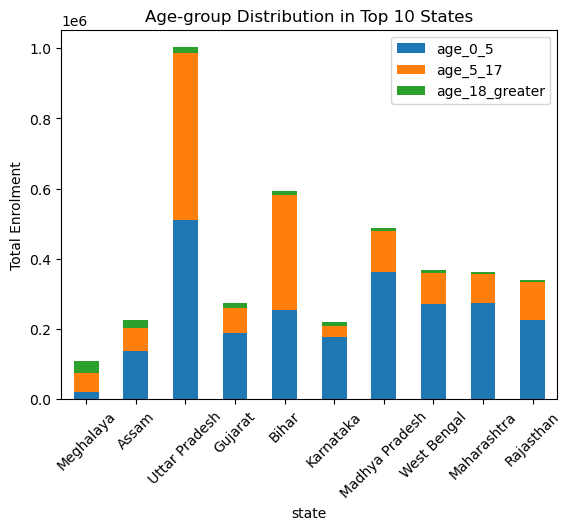

In [240]:
age_state = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()
age_state = age_state.sort_values('age_18_greater', ascending=False).head(10)

plt.figure(figsize=(10,6))
age_state.plot(kind='bar', stacked=True)
plt.title("Age-group Distribution in Top 10 States")
plt.ylabel("Total Enrolment")
plt.xticks(rotation=45)
plt.show()

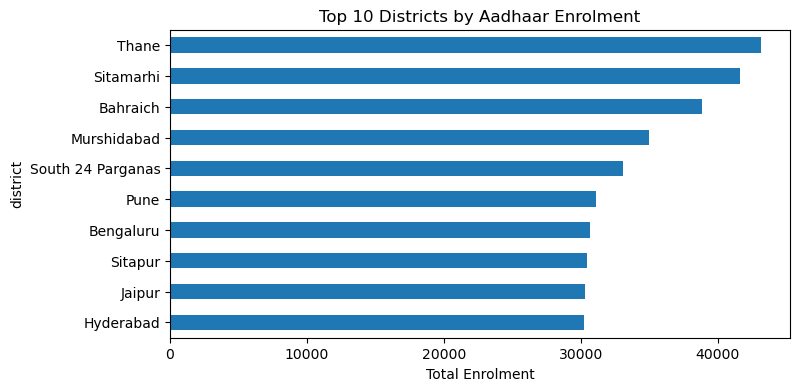

In [241]:
top_districts = (
    df.groupby('district')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_districts.plot(kind='barh')
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.xlabel("Total Enrolment")
plt.gca().invert_yaxis()
plt.show()

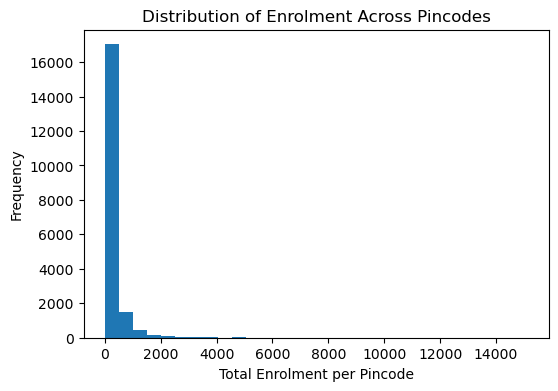

In [242]:
pincode_enrol = (
    df.groupby('pincode')['total_enrolment']
    .sum()
)

plt.figure(figsize=(6,4))
plt.hist(pincode_enrol, bins=30)
plt.title("Distribution of Enrolment Across Pincodes")
plt.xlabel("Total Enrolment per Pincode")
plt.ylabel("Frequency")
plt.show()

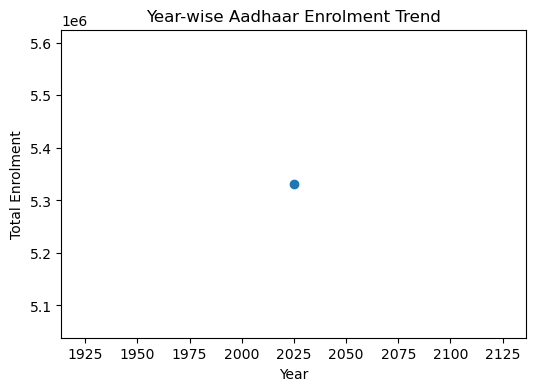

In [243]:
yearly = df.groupby('year')['total_enrolment'].sum()

plt.figure(figsize=(6,4))
yearly.plot(marker='o')
plt.title("Year-wise Aadhaar Enrolment Trend")
plt.ylabel("Total Enrolment")
plt.xlabel("Year")
plt.show()

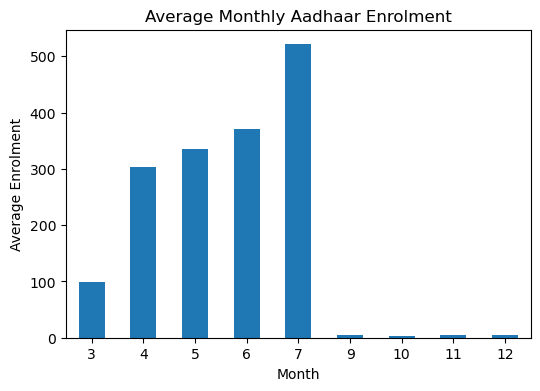

In [244]:
monthly_avg = (
    df.groupby('month')['total_enrolment']
    .mean()
)

plt.figure(figsize=(6,4))
monthly_avg.plot(kind='bar')
plt.title("Average Monthly Aadhaar Enrolment")
plt.ylabel("Average Enrolment")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

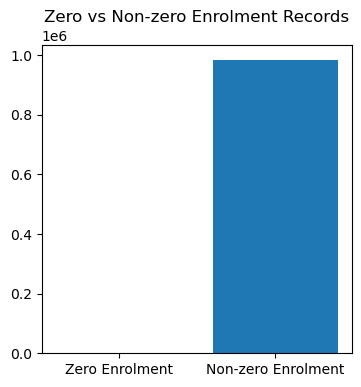

In [245]:
zero_rows = (df['total_enrolment'] == 0).sum()

plt.figure(figsize=(4,4))
plt.bar(['Zero Enrolment','Non-zero Enrolment'],
        [zero_rows, len(df) - zero_rows])
plt.title("Zero vs Non-zero Enrolment Records")
plt.show()

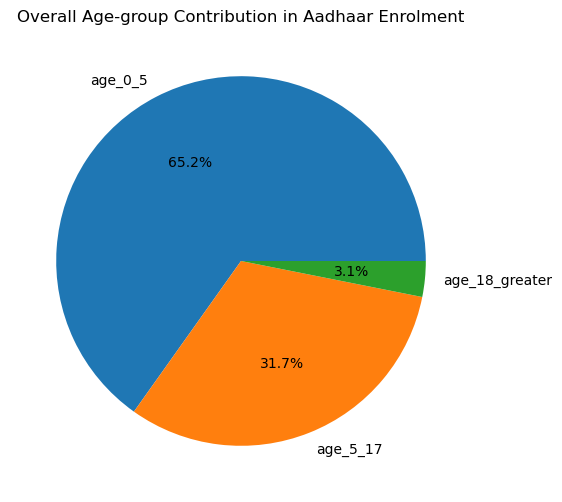

In [246]:
age_sum = df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(6,6))
age_sum.plot(kind='pie', autopct='%1.1f%%')
plt.title("Overall Age-group Contribution in Aadhaar Enrolment")
plt.ylabel("")
plt.show()

----------------------------------------------------------------------------

### 1. Data Cleaning Approach

Before starting any analysis, the enrolment dataset was carefully cleaned to avoid misleading insights. 
Since the data was collected from multiple files and large-scale government sources, inconsistencies were expected.

The following cleaning steps were performed:

**1. Combining Multiple Files**
The enrolment data was provided in multiple CSV files split by record ranges. 
All files were combined into a single dataset to ensure complete coverage before analysis.

**2. Duplicate Record Removal**
After merging the files, duplicate rows were identified and removed. 
This step was necessary to prevent double counting of enrolment records, which could inflate state or district-level numbers.

**3. State Name Standardization**
The dataset contained inconsistent state names due to spelling differences, legacy names, and formatting issues 
(e.g., 'Orissa' vs 'Odisha', 'West Bangal' vs 'West Bengal').
State names were cleaned using string normalization and mapping to ensure accurate state-wise comparisons.

**4. Age Group Validation**
The enrolment data was already grouped into three age categories (0–5, 5–17, 18+).
Missing values in these columns were treated as zero and converted to numeric format.
A new column `total_enrolment` was created by summing all age groups to represent total enrolment per record.

**5. Date Handling**
Dates were originally present as text values in DD-MM-YYYY format.
To avoid ambiguity, raw date values were preserved and then converted to datetime format using day-first parsing.
Since daily enrolment timestamps can be unreliable in government data, analysis was restricted to monthly and yearly levels.

After these steps, the dataset contained no missing values and was suitable for analysis and visualization.


### 2. State-wise Enrolment Distribution

### Observation
The state-wise enrolment bar chart shows a clear imbalance in Aadhaar enrolment across states.
A few large states account for a significantly higher share of total enrolments.

### Interpretation
This suggests higher population pressure as well as increased dependency on Aadhaar-based services in these states.
Such concentration can lead to longer waiting times and service delays at enrolment centres.

### Practical Implication
In further analysis, combining this data with demographic information (population density, migration trends) 
can help identify whether the high enrolment is due to population size or frequent updates.
This insight can support better allocation of enrolment centres.


### 3. Age Group Contribution (Pie Chart)

### Observation
The age-wise enrolment distribution shows that enrolments for the 0–5 age group are significantly lower 
compared to older age groups.

### Interpretation
This indicates delayed Aadhaar enrolment among children, which may later create issues during school admissions 
or welfare scheme access.

### Practical Implication
Linking enrolment data with demographic and birth registration datasets can help understand 
whether this gap is due to awareness issues or access limitations at early stages.


### 4. Monthly Trend Analysis

### Observation
Monthly enrolment trends show noticeable variation across months, indicating periods of higher enrolment activity.

### Interpretation
This could be influenced by policy changes, academic admission cycles, or migration-related updates.

### Practical Implication
When combined with biometric authentication failure data in future analysis, 
these peaks can help identify whether enrolment centres experience operational stress during specific periods.


### Summary of Enrolment Analysis

This notebook focused on understanding Aadhaar enrolment patterns across states, districts, age groups, and time.
The analysis highlighted regional imbalance, delayed child enrolment, and seasonal enrolment pressure.
While enrolment data alone does not explain the complete Aadhaar ecosystem, it provides a strong foundation.
Further insights can be derived by combining enrolment trends with demographic and biometric datasets.


### Limitations

This analysis is based only on enrolment records.
It does not capture population size, migration reasons, or biometric authentication issues.
These aspects will be addressed in subsequent analysis using demographic and biometric datasets.


In [247]:
df.to_csv(
    "../cleaned/enrolment_clean_final.csv",
    index=False
)
